### Training LSTM model

The following code is designed to train 32 different models by combination of different pre-processing methods. The order of the below processes reflects the order of the preprocessing methods.
<list>
- Expansion of contractions
- Basic preprocessing
- Grammar correction
- Simplification of negations
- Lemmatization
- Removal of stop words

#### Imports

In [3]:
import imports as ii
import functions as f
import preprocessing as pp
import neuralnetworks as nn
import trainRNN as trainRNN

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Read-in the datasets

In [4]:
PATH = {}
PATH["dataset_classification"] = "dataset/classification/"
PATH["dataset_labeling"] = "dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test.json.gz"
train = f.readJson(PATH["music_reviews_train"])
test = f.readJson(PATH["music_reviews_dev"])

Number of data:  100000
Number of data:  10000


#### Define features of training

Below variables defining:
<list>
- leng = how many sentence will be used for the training
- maxlen = maximum length of words in each sentences both in the training and test data

In [6]:
leng = 5000
maxlen = 40

In [7]:
# read in train and test data

X_train, y_train, train_idx, train_missing_idx = f.json_divide(train)
X_test, y_test, test_idx, test_missing_idx = f.json_divide(test)

# convert labels

sent_dict = {"positive": 1, "negative": 0}
y_train = pp.sentiment_converter(y_train, sent_dict)
y_test = pp.sentiment_converter(y_test, sent_dict)

# sampling

start = 6666 # just a number

X_train = X_train[start:start+leng]
y_train = y_train[start:start+leng]


#### Grid search & Training
Below code generating 32 combinations of each preprocessing methods on the train and test set. The structure of the generated datasets is:
<list> 
- data_sets[0] - First preprocessing combination
- data_set[0][0] - Labels array of the combinations. For instance:  [0,1,0,0,0,0] meaning only the basic pre-processing was applied, the rest was not
- data_sets[0][1] - Preprocessed Train set
- datasets[0][2] - Preprocessed Dev set
    
</list>

It's running for a while since it is generating a relatively huge set

In [10]:
data_sets, y_train, y_test = f.grid_search(X_train, X_test, y_train, y_test)

#### Ratio of fully catched sentences
Basic statistics about the ratio of sentencies which were fully catched with the given maximum sentence length variable

In [ ]:
f.statistics_sets_sizes(data_sets, max_len=maxlen)

### Training the LSTM model
Training and evaulation takes around one hour with 5000 sentences

In [ ]:
trainRNN.trainRNN(data_sets, y_train, y_test, early_stop_patience=2, filename="dummy", maxlen=maxlen)

### Re-training an LSTM model
The code below is written for train a model with a given pre-process combination or combinations. Note: Early stopping criteria set to 10, meaning model is able to overfit.

Combinations:  [1, 1, 1, 1, 1, 1]
Epoch 1/10
200/200 [==============================] - 14s 58ms/step - loss: 0.6170 - accuracy: 0.7070 - val_loss: 0.5396 - val_accuracy: 0.7141 - lr: 0.0010
Epoch 2/10
199/200 [============================>.] - ETA: 0s - loss: 0.4213 - accuracy: 0.8410
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
200/200 [==============================] - 11s 55ms/step - loss: 0.4217 - accuracy: 0.8406 - val_loss: 0.5351 - val_accuracy: 0.7881 - lr: 0.0010
Epoch 3/10
199/200 [============================>.] - ETA: 0s - loss: 0.1852 - accuracy: 0.9399
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
200/200 [==============================] - 11s 55ms/step - loss: 0.1851 - accuracy: 0.9400 - val_loss: 0.5232 - val_accuracy: 0.8145 - lr: 2.0000e-04
Epoch 4/10
199/200 [============================>.] - ETA: 0s - loss: 0.1510 - accuracy: 0.9532
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e

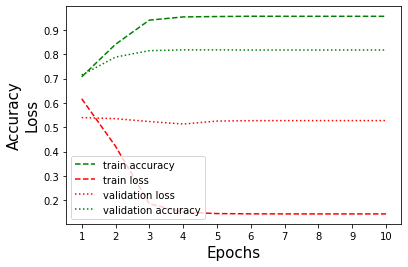

Combinations were checked
Combinations:  [0, 1, 0, 0, 0, 0]
Epoch 1/10
200/200 [==============================] - 17s 79ms/step - loss: 0.6078 - accuracy: 0.7328 - val_loss: 0.4737 - val_accuracy: 0.8437 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - 15s 74ms/step - loss: 0.2702 - accuracy: 0.8980 - val_loss: 0.4497 - val_accuracy: 0.7987 - lr: 0.0010
Epoch 3/10
199/200 [============================>.] - ETA: 0s - loss: 0.1573 - accuracy: 0.9495
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
200/200 [==============================] - 14s 70ms/step - loss: 0.1567 - accuracy: 0.9496 - val_loss: 0.6304 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 4/10
199/200 [============================>.] - ETA: 0s - loss: 0.0854 - accuracy: 0.9795
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
200/200 [==============================] - 14s 72ms/step - loss: 0.0854 - accuracy: 0.9794 - val_loss: 0.6254 - val_accuracy: 0.8390 -

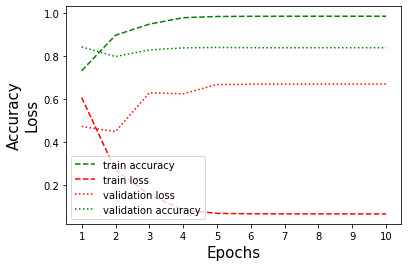

Combinations were checked


In [17]:
# define combinations
combination = [[1,1,1,1,1,1], [0,1,0,0,0,0]]

# name of the file which will contain the LOGS
filename = "retraining"

# early stopping criteria - max 10! 
early_stop_patience = 10

for comb in combination:
    data_sets, y_train, y_test = f.grid_search_retrain(X_train, X_test, y_train, y_test, comb)
    trainRNN.trainRNN(data_sets, y_train, y_test, early_stop_patience=early_stop_patience, filename=filename, maxlen=maxlen)